# CORA dataset download and processing

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Dataset download

In [2]:
# Download CORA dataset. This dataset contains two files
# - cora.cites: contains the citation graph of the corpus: <ID of cited paper> <ID of citing paper>
# - cora.content: contains descriptions of the papers: <paper_id> <word_attributes>+ <class_label>
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

168052/168052 [==============================] - 0s 2us/step


In [3]:
# Read cora.cites. This file contains the citation graph.
citations = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep="\t", header=None, names=["target", "source"])
print("Citations shape:", citations.shape)

# Print some citation samples
print("Citations shape:", citations.shape)
citations.sample(n=10)

Citations shape: (5429, 2)
Citations shape: (5429, 2)


,target,source
3717,80515,314459
3514,66782,51834
2689,29723,6818
3369,57773,1154524
2537,27535,34961
2084,16476,16474
3600,73323,28447
580,2440,136768
3510,66751,573535
3294,54129,593022


In [4]:
# Read cora.content. This file contains descriptions of the papers.
column_names = ["paper_id"] + [f"word_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names)

# Print some citation samples
print("Papers shape:", papers.shape)
papers.sample(n=10)

Papers shape: (2708, 1435)


,paper_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432,subject
1418,469504,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
715,1105698,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Probabilistic_Methods
1119,100961,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
359,5348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
842,1128267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
693,179702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2013,151708,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Neural_Networks
1210,1118388,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based
46,284025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2316,801170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms


# Generate New Mapping for Paper Index and Subject Index


In [5]:
# Get list of unique paper subjects / classes. These are the labels for Node (Paper) Classification.
class_values = sorted(papers["subject"].unique())

# Generate corresponding list of unique class indices
class_idx = {name: idx for idx, name in enumerate(class_values)}

# Generate list of unique class indices
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

In [6]:
### Map the original papers and citations information (paper_idx and class_idx) to the new information

# Map original paper index to the new paper index
papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])

# Map original paper subject (string) to the new paper subject (integer)
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

# Map original source/target paper index to the new source/target paper index
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])

In [7]:
papers_no_subject = papers.drop(["subject"], axis=1)

In [8]:
papers_no_subject

,paper_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_1423,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432
0,462,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1911,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,248,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,519,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2704,2371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2705,2372,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2706,955,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Get positive edges and negatives edges

In [9]:
import random
# Create positive samples: pair all papers in the citation graphs
positive_edges = set(zip(citations["source"], citations["target"]))

# Create negative samples: pairs random papers that doesn't cite each other
negative_edges = set()
while len(negative_edges) < 10000:
  paper1_index = random.randint(0, 2708)
  paper2_index = random.randint(0, 2708)
  if (citations["source"][paper1_index], citations["target"][paper2_index]) not in positive_edges and (citations["target"][paper2_index], citations["source"][paper1_index]) not in positive_edges and (citations["target"][paper2_index], citations["source"][paper1_index]) not in negative_edges and (citations["source"][paper1_index], citations["target"][paper2_index]) not in negative_edges:
      negative_edges.add((citations["source"][paper1_index], citations["target"][paper2_index]))
print(len(positive_edges))
print(len(negative_edges))
# Combine positive and negative samples
all_edges_data = []


#From the list of positive and negative edges, take the corresponding paper information from the papers_no_subject dataset
#add 1 for positive and 0 for negative
for edge in positive_edges:
    src_idx, tgt_idx = edge
    src_features = papers_no_subject[papers_no_subject["paper_id"] == src_idx]
    tgt_features = papers_no_subject[papers_no_subject["paper_id"] == tgt_idx]
    edge_features = np.hstack([src_features, tgt_features])
    all_edges_data.append((edge_features, 1))

for edge in negative_edges:
    src_idx, tgt_idx = edge
    src_features = papers_no_subject[papers_no_subject["paper_id"] == src_idx]
    tgt_features = papers_no_subject[papers_no_subject["paper_id"] == tgt_idx]
    edge_features = np.hstack([src_features, tgt_features])
    all_edges_data.append((edge_features, 0))



5429
10000


In [10]:
#combine all the positive and negatives edges so we can use them for the GNN
all_edges_gnn = positive_edges.union(negative_edges)
all_edges_gnn_list = list(all_edges_gnn)

# Get features and labels, and then split the dataset

In [11]:
# Shuffle the data
np.random.shuffle(all_edges_data)

#get labels (1 and 0) and features (papers information)
labels = []
features = []
for i in range(len(all_edges_data)):
  label = all_edges_data[i][1]
  labels.append(label)
  feature = all_edges_data[i][0][0]
  feature = np.delete(feature, 0)
  feature = np.delete(feature, 1433)
  features.append(feature)

#convert them to array
features = np.asarray(features).astype(np.float32)
labels =np.array(labels).astype(np.float32)


# Split into training, validation, and test sets
num_samples = len(features)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
num_train = int(num_samples * train_ratio)
num_val = int(num_samples * val_ratio)
num_test = int(num_samples * test_ratio)

x_train_edges = features[:num_train]
x_train_edges_gnn = all_edges_gnn_list[:num_train]
y_train_edges = labels[:num_train]

x_val_edges = features[num_train:num_train+num_val]
x_val_edges_gnn = all_edges_gnn_list[num_train:num_train+num_val]
y_val_edges = labels[num_train:num_train+num_val]

x_test_edges = features[num_train+num_val:]
x_test_edges_gnn = all_edges_gnn_list[num_train+num_val:]
y_test_edges = labels[num_train+num_val:]

# Build model

In [12]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
# Feed Forward Network setup: number of FC layers and number of nodes in each FC layer
hidden_units = [32, 32]

# Feed Forward Network setup: dropout rate at DropOut layer
dropout_rate = 0.5

def create_ffn(hidden_units_ffn, dropout_rate_ffn):
    fnn_layers = []

    for units in hidden_units_ffn:
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))
        fnn_layers.append(layers.Dropout(dropout_rate_ffn))
        fnn_layers.append(layers.BatchNormalization())

    # A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
    return keras.Sequential(fnn_layers)

# Create a Deep Neural Network (DNN) for edge prediction
def create_dnn_model(hidden_units_ffn, dropout_rate_ffn, model_name):
    # Input of DNN is the concatenated feature vector of two nodes
    inputs = layers.Input(shape=(2866,))

    # Embed the original features dimension to hidden_units space by using the Feed Forward Network (FFN).
    x = create_ffn(hidden_units_ffn, dropout_rate_ffn)(inputs)

    # Then perform feature extraction by using some skip connection blocks
    for block_idx in range(4):
        # Create an FFN block
        x1 = create_ffn(hidden_units_ffn, dropout_rate_ffn)(x)
        # Add skip connection
        x = x + x1

    # Add output layer with sigmoid activation for binary classification (edge or no edge)
    outputs = layers.Dense(1, activation=tf.nn.sigmoid)(x)

    # Create the model.
    return keras.Model(inputs=inputs, outputs=outputs, name=model_name)

dnn_model = create_dnn_model(hidden_units, dropout_rate, "DNN")
dnn_model.summary()

# Compile the DNN model
dnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

Model: "DNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2866)]       0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           93056       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           2368        ['sequential[0][0]']             
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 32)          0           ['sequential[0][0]',             
 da)                                                              'sequential_1[0][0]']         

In [13]:
#train the model
history_dnn = dnn_model.fit(
    x=x_train_edges,
    y=y_train_edges,
    epochs=100,
    batch_size=1024,
    validation_data=(x_val_edges, y_val_edges)
)

Epoch 1/100
11/11 [==============================] - 14s 61ms/step - loss: 0.9667 - acc: 0.5637 - val_loss: 0.6463 - val_acc: 0.6504
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 0.7315 - acc: 0.5995 - val_loss: 0.6579 - val_acc: 0.6465
Epoch 3/100
11/11 [==============================] - 0s 21ms/step - loss: 0.6641 - acc: 0.6308 - val_loss: 0.6412 - val_acc: 0.6504
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.6461 - acc: 0.6457 - val_loss: 0.6362 - val_acc: 0.6504
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 0.6314 - acc: 0.6586 - val_loss: 0.6320 - val_acc: 0.6504
Epoch 6/100
11/11 [==============================] - 0s 21ms/step - loss: 0.6247 - acc: 0.6717 - val_loss: 0.6209 - val_acc: 0.6508
Epoch 7/100
11/11 [==============================] - 0s 22ms/step - loss: 0.6106 - acc: 0.6814 - val_loss: 0.6099 - val_acc: 0.6599
Epoch 8/100
11/11 [==============================] - 0s 21ms/step - loss: 0

# Evaluate and test model performance

In [14]:
# Evaluate the DNN model on the test set for edge prediction
dnn_model_eval = dnn_model.evaluate(x_test_edges, y_test_edges)
print("List of metrics" + str(dnn_model.metrics_names))  # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().
print("Test loss: " + str(dnn_model_eval[0]))  # Test loss
print("Test accuracy: " + str(dnn_model_eval[1]))  # Test accuracy

73/73 [==============================] - 0s 3ms/step - loss: 1.0286 - acc: 0.8181
List of metrics['loss', 'acc']
Test loss: 1.0286070108413696
Test accuracy: 0.8181425333023071


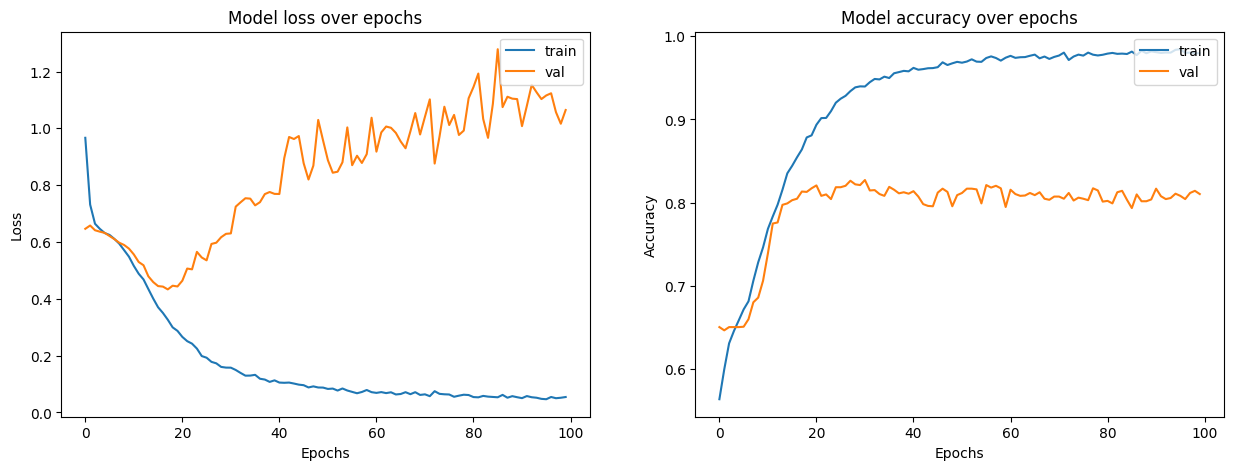

In [15]:
# Plot model performance during training
def plot_learning_curves(history):
    # Initialize the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot model loss during training
    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "val"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title("Model loss over epochs")

    # Plot model accuracy during training
    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "val"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Model accuracy over epochs")
    plt.show()

plot_learning_curves(history_dnn)

In [16]:
#function to check if two papers cite each other, print "in" if yes and "not in" if no
def to_in_or_not_to_in(a, b):
  if (a, b) not in positive_edges and (b, a) not in positive_edges:
    print("not in")
  if (a, b) in positive_edges or (b, a) in positive_edges:
    print("in")

In [17]:
to_in_or_not_to_in(1232, 128)

not in


In [18]:
#Test the model
paper1 = papers_no_subject[papers_no_subject["paper_id"] == 1232]
paper1 = paper1.drop("paper_id", axis=1)
paper1_np = paper1.to_numpy()

paper2 = papers_no_subject[papers_no_subject["paper_id"] == 128]
paper2 = paper2.drop("paper_id", axis=1)
paper2_np = paper2.to_numpy()

citation_pair = np.hstack([paper1_np, paper2_np])
dnn_model.predict(citation_pair)

1/1 [==============================] - 0s 319ms/step


array([[0.0002732]], dtype=float32)